In [1]:
import pandas as pd
A = pd.read_csv("/Users/sourabhdabke/Documents/ETL_Hive/Datasets/Cars93.csv")

In [2]:
A.head(3)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

## Find missing(NaN,blank,NULL) values

#### Find out how many missing values in each column

In [4]:
A.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

<AxesSubplot:>

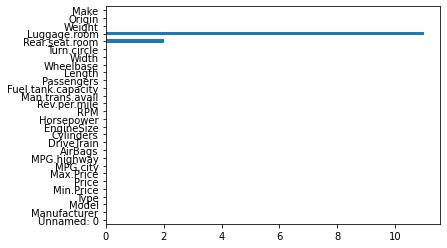

In [5]:
A.isnull().sum().plot(kind="barh")

In [6]:
Q = pd.DataFrame(A.isna().sum())
Q.columns = ["Count_Missing"]
Q

,Count_Missing
Unnamed: 0,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,0


In [7]:
Q[Q.Count_Missing > 0]

,Count_Missing
Rear.seat.room,2
Luggage.room,11


In [8]:
def catcon(A):
    cat = []
    con = []
    for i in A.columns:
        if(A[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [9]:
catcon(A)

(['Manufacturer',
  'Model',
  'Type',
  'AirBags',
  'DriveTrain',
  'Cylinders',
  'Man.trans.avail',
  'Origin',
  'Make'],
 ['Unnamed: 0',
  'Min.Price',
  'Price',
  'Max.Price',
  'MPG.city',
  'MPG.highway',
  'EngineSize',
  'Horsepower',
  'RPM',
  'Rev.per.mile',
  'Fuel.tank.capacity',
  'Passengers',
  'Length',
  'Wheelbase',
  'Width',
  'Turn.circle',
  'Rear.seat.room',
  'Luggage.room',
  'Weight'])

In [10]:
def UNIVARIATE(df,m,n):
    import matplotlib.pyplot as plt
    import seaborn as sb
    from warnings import filterwarnings
    filterwarnings("ignore")
    cat,con = catcon(df)
    plt.figure(figsize=(m,n))
    tot_columns = df.shape[1]
    rows = 2
    columns = int(tot_columns/2)+1
    plot_no = 1
    for i in cat:
        plt.subplot(columns,rows,plot_no)
        sb.countplot(df[i])
        plot_no = plot_no + 1
    for i in con:
        plt.subplot(columns,rows,plot_no)
        sb.distplot(df[i])
        plot_no = plot_no + 1

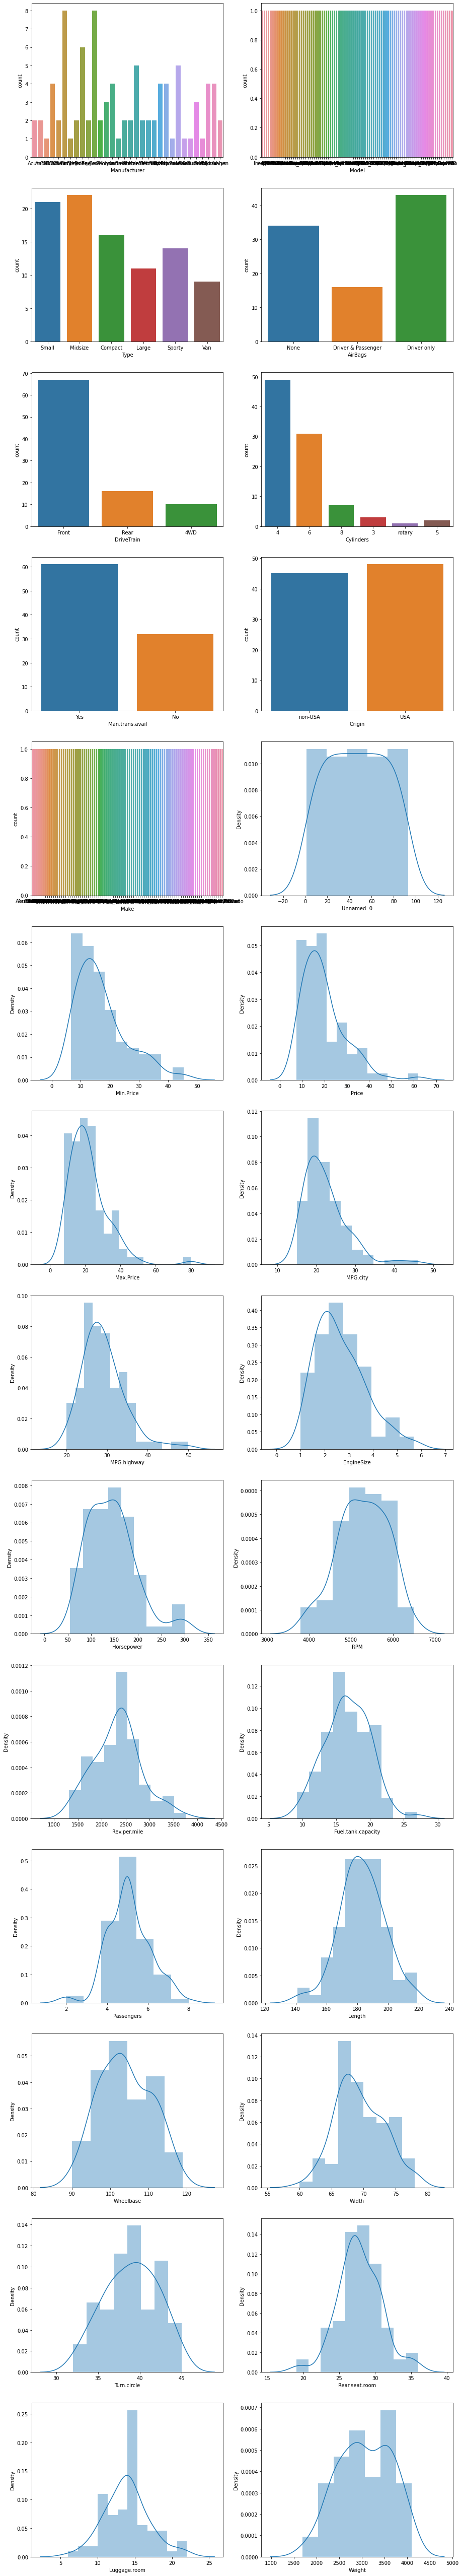

In [11]:
UNIVARIATE(A,15,100)